## Questions:
#### By: Dr. Sanjay Gupta - CNN

1. **What is the coronavirus ? Is it related to Corona beer ?**  
The two are totally unrelated, but originate from the same word: 'Corona' meaning crown (microscopic structure of proteins on virus). Coronavirus are a family of viruses that have been around for a while. There have been several coronaviruses that have made jump from animals to humans. SAARS and MERS are some that have previously happened.  
The current virus is 'Novel' coronavirus, something that humans have not experienced before. It is unclear how this originated but some early reports suggested that people who were first infected had some interaction at an animal market in China.  
<br/>
2. **What are the symptoms ?**  
Symptoms are similar to common cold (caused by the rhinovirus) or Flu (caused by influenza virus). These affect respiratory systems, cough, muscle ache, difficulty breathing, tiredness.  
Novel coronavirus seems to affect the lower respirtory system more than upper respiratory system, i.e. its deeply rooted in lungs, respiratory breathing problems for people who do have symptoms and less likely to have upper respiratory symptoms like sore throat or runny nose (these indicate a likely cold or flu).  
***Around 80% of diagnosed people (2 Mar) had minimal or no symptoms at all***. So the vast majority of people who are going to be affected are not going to get really sick from it.  
***Children for some reason seem to be most insulated from coronavirus (no reason found so far)***, it's only going to be some people who are going to be at most risk from coronavirus.  
<br/>
3. **Who is going to be at most risk ?**
People who are elderly, weakened immune system, heart disease, lung disease, diabetes (and other similar) are going to be at most risk. With pre-existing medical condition or age the capacity to fight off the infection is reduced.  
<br/>
4. **How does it spread ?**  
When coughing or sneezing, inside the respiratory droplets there are lots of viral particles. These particles can hang in the air for a little bit and someone can breathe on them. They can get on a surface and someone can touch it and then touch their eyes, nose or mouth.  
The unusual thing about this virus is that it can spread even in incubation stage, i.e. someone showing no symptoms at all can also carry and spread the virus (which makes it highly infectious: for each person affected they can affect 2.5 -3.8 people in turn).  
***Everyone needs to be aware that they may not have symptoms but they can spread it to others who might have weakened immune systems, ex. elder people or people with already existing medical condition in your house or at work***  
This is the current information (2 Mar) but it can change depending on how the virus progresses and mutates, which it will do, but typically when the virus mutates it becomes ***less lethal*** even if it becomes more transmissible.  
<br/>
5. **How afraid should we be ?**
Good news: 80% of us (or affected people) are not even going to know we had this virus, others can get ill or critically sick and around 2-3% can even die (2 Mar), this may be even lower as people who don't show symptoms may not even go to hospital or be diagnosed ever. In context Ebola has a mortality rate of 50%.











In [140]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
%matplotlib inline 

Import the data (make sure you update this on a daily basis)

In [141]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [142]:
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [218]:
cols = confirmed_df.keys()
cols[-1]

'3/14/20'

Get all the dates for the outbreak

In [219]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [220]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [221]:
list_of_countries         = np.unique(confirmed_df["Country/Region"])
accumulated_confirmed_df  = confirmed_df.groupby(["Country/Region"]).sum()
accumulated_recoveries_df = recoveries_df.groupby(["Country/Region"]).sum()
accumulated_deaths_df     = deaths_df.groupby(["Country/Region"]).sum()

print(list_of_countries, '\n')

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Colombia' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cruise Ship' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Eswatini' 'Ethiopia'
 'Finland' 'France' 'French Guiana' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Guadeloupe' 'Guatemala' 'Guernsey' 'Guinea' 'Guyana' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, South' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta'
 'Martinique' 'Mauritania' 'Mexico' 'Moldova' 'Monac

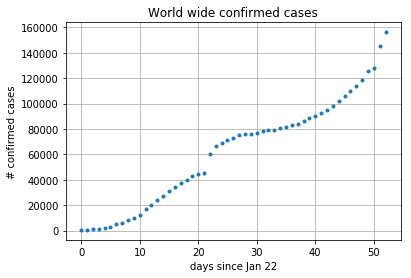

In [222]:
accum_cols     = accumulated_confirmed_df.columns
accum_indices  = accumulated_confirmed_df.index
data           = np.sum(np.array(accumulated_confirmed_df.loc[:, accum_cols[2]:accum_cols[-1]]), axis=0)

plt.plot(data, '.')

plt.grid()
plt.title('World wide confirmed cases')
plt.xlabel("days since Jan 22")
plt.ylabel("# confirmed cases")
plt.show()


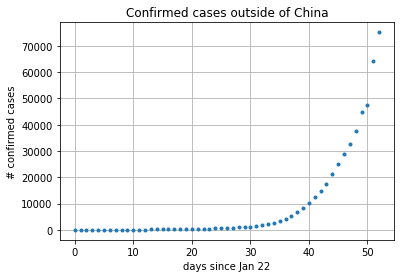

In [225]:
country= "China"
ind  = accum_indices[np.where(accum_indices!=country)[0]]
data    = np.sum(np.array(accumulated_confirmed_df.loc[ind, accum_cols[2]:accum_cols[-1]]), axis=0) # add all regions of given countries
plt.plot(data,'.')

plt.grid()
plt.title('Confirmed cases outside of China')
plt.xlabel("days since Jan 22")
plt.ylabel("# confirmed cases")
plt.show()

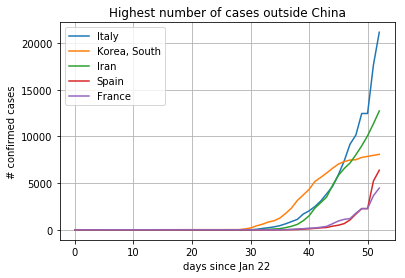

In [276]:
total_df           = pd.DataFrame(np.c_[accum_indices, np.sum(accumulated_confirmed_df.loc[:, accum_cols[2]:accum_cols[-1]], axis=1)], columns=['Country','total']) 
country_wise_total = total_df.sort_values('total', ascending=False)

top_5_countries_except_china = np.array(country_wise_total['Country'][1:6])

for country in top_5_countries_except_china:
    data    = np.array(accumulated_confirmed_df.loc[country, accum_cols[2]:accum_cols[-1]])
    plt.plot(data,label=country)

plt.grid()
plt.title('Highest number of cases outside China')
plt.xlabel("days since Jan 22")
plt.ylabel("# confirmed cases")
plt.legend()
plt.show()

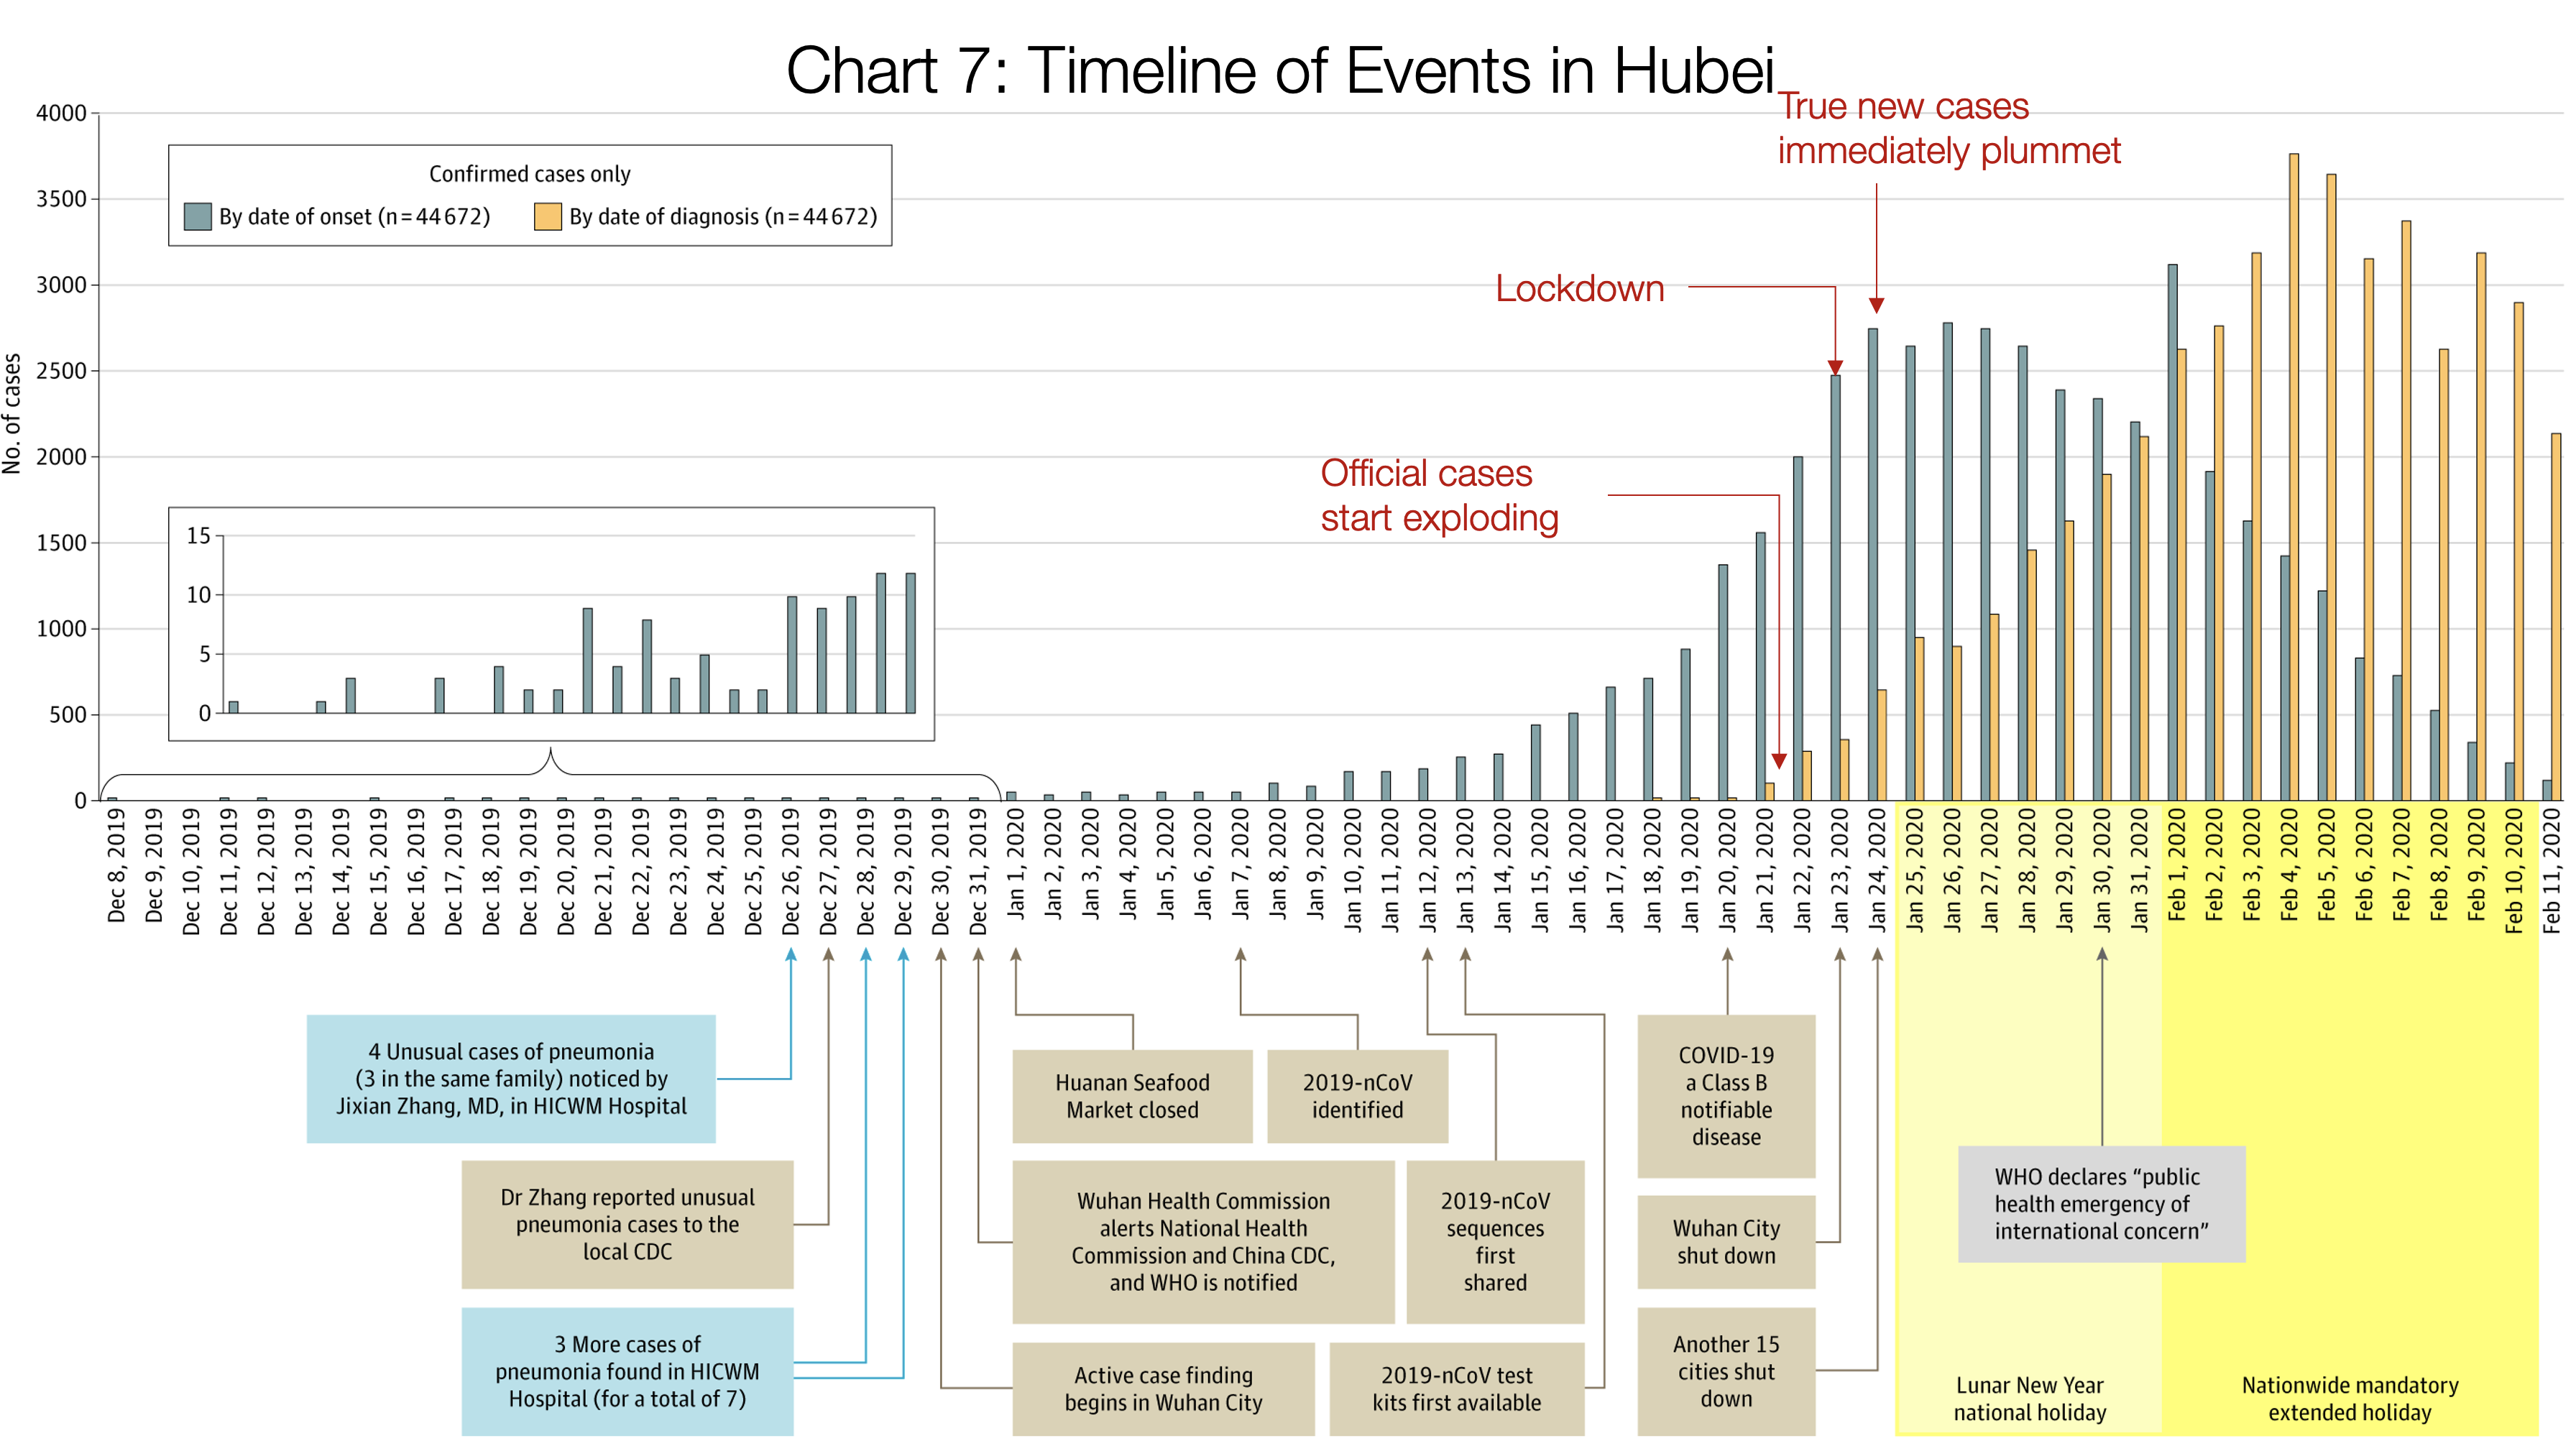